In [1]:
#파이썬 라이브러리
import numpy as np
import pandas as pd
import missingno as msno
import platform
import seaborn as sns 
import folium
import dmba
import glob
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from scipy.stats import chi2_contingency

# matplotlib 폰트설정
if platform.system() == 'Darwin':# For MacOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':# For Windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry')
    
plt.rcParams['axes.unicode_minus'] = False# 마이너스 처리
    
from IPython.display import set_matplotlib_formats# 시각화 그래프 선명
set_matplotlib_formats('retina')

no display found. Using non-interactive Agg backend


In [2]:
all_files = glob.glob("seoulStore.csv") # 데이터 불러오기 
df_store = pd.read_csv(all_files[0], index_col=None, header=0) # 파일의 데이터가 df_store DataFrame 객체에 로드
#df_store = dmba.load_data("seoulStore.csv")

In [3]:
# ⚫ 데이터 전처리1- 처리
print(df_store.shape) # 데이터 정보 - 데이터 전처리 전 상황 파악
df_store.info()
# df_store.head()

(474260, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474260 entries, 0 to 474259
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     474260 non-null  object 
 1   상호명        474260 non-null  object 
 2   지점명        1216 non-null    object 
 3   상권업종대분류코드  474260 non-null  object 
 4   상권업종대분류명   474260 non-null  object 
 5   상권업종중분류코드  474260 non-null  object 
 6   상권업종중분류명   474260 non-null  object 
 7   상권업종소분류코드  474260 non-null  object 
 8   상권업종소분류명   474260 non-null  object 
 9   표준산업분류코드   474260 non-null  object 
 10  표준산업분류명    474260 non-null  object 
 11  시도코드       474260 non-null  int64  
 12  시도명        474260 non-null  object 
 13  시군구코드      474260 non-null  int64  
 14  시군구명       474260 non-null  object 
 15  행정동코드      474260 non-null  int64  
 16  행정동명       474260 non-null  object 
 17  법정동코드      474260 non-null  int64  
 18  법정동명       474260 non-null  object 
 19  지번코드      

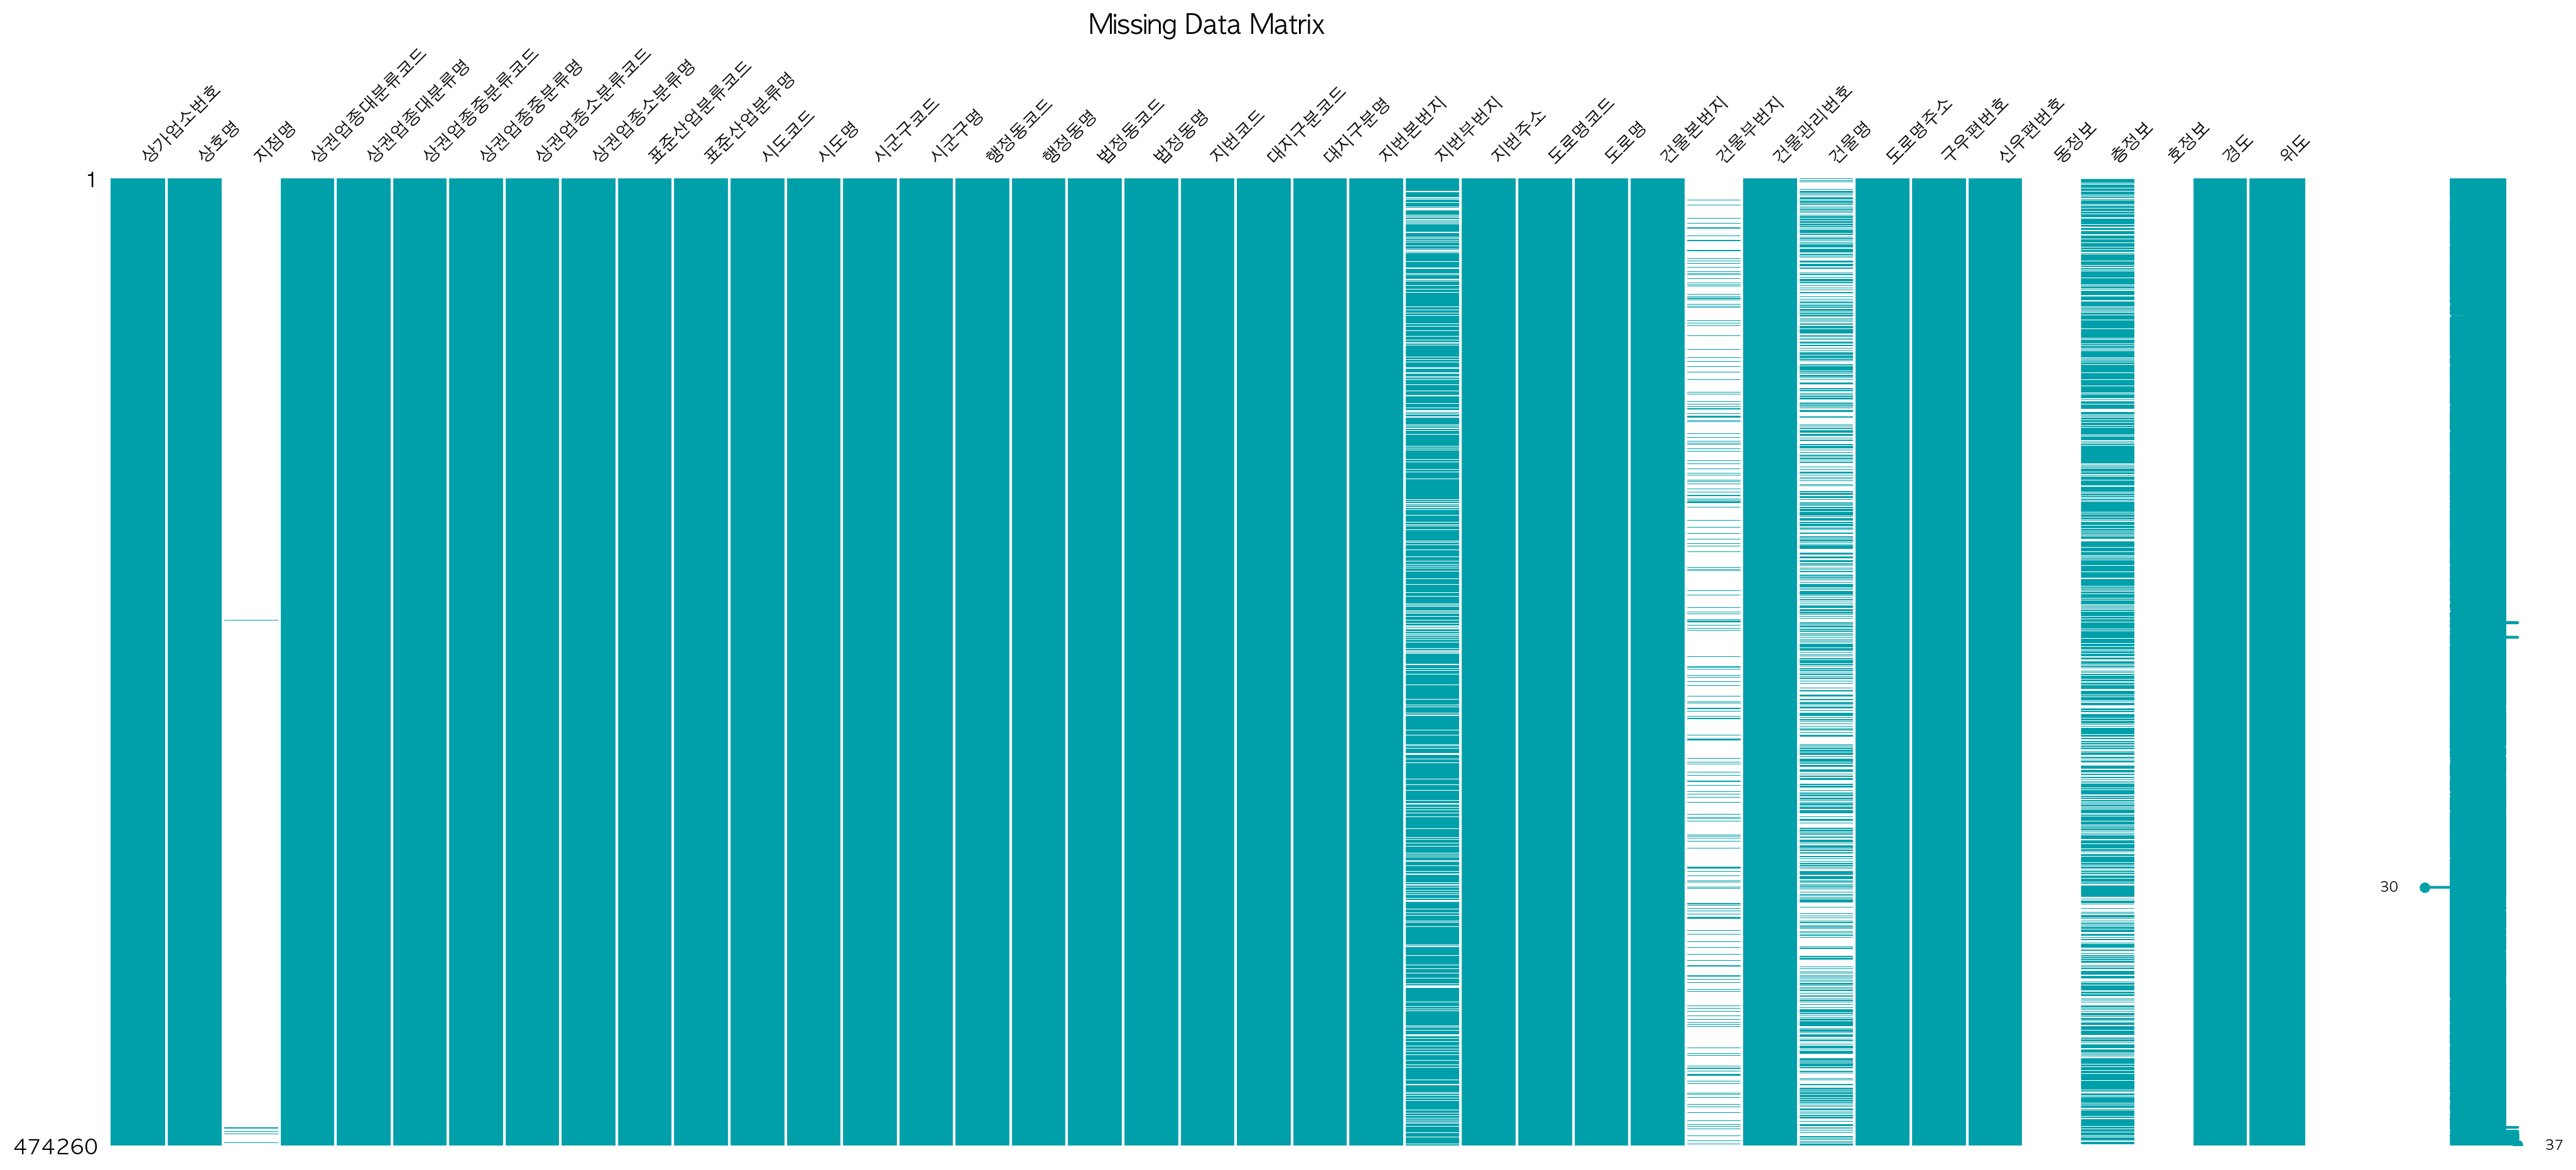

In [4]:
msno.matrix(df_store, fontsize=10,color=(0, 160/255, 170/255)) # 결측치를 시각화
plt.title('Missing Data Matrix', fontsize=15)

plt.show()

In [5]:
df_store.isnull().sum() # null값 파악

상가업소번호            0
상호명               0
지점명          473044
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드          0
표준산업분류명           0
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         78459
지번주소              0
도로명코드             0
도로명               0
건물본번지             1
건물부번지        411954
건물관리번호            4
건물명          250766
도로명주소             0
구우편번호             0
신우편번호             0
동정보          474260
층정보          147360
호정보          474260
경도                0
위도                0
dtype: int64

In [6]:
drop_columns = ['지점명', '건물부번지',  '건물관리번호', '건물명', '동정보', '층정보', '호정보', # null값 
                '상가업소번호', '상권업종대분류코드',  '상권업종중분류코드', '상권업종소분류코드', # 이번 분석에 불필요한 파라미터 
                '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드', '시도명', 
                '시군구코드', '행정동코드', '법정동코드','지번코드', '대지구분코드', '대지구분명',
                '지번본번지', '지번부번지',  '도로명코드', '건물본번지', '도로명주소', '구우편번호']
df_store = df_store.drop(drop_columns, axis=1) # 제거
df_store.info() # 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474260 entries, 0 to 474259
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       474260 non-null  object 
 1   상권업종대분류명  474260 non-null  object 
 2   상권업종중분류명  474260 non-null  object 
 3   시군구명      474260 non-null  object 
 4   행정동명      474260 non-null  object 
 5   법정동명      474260 non-null  object 
 6   지번주소      474260 non-null  object 
 7   도로명       474260 non-null  object 
 8   신우편번호     474260 non-null  int64  
 9   경도        474260 non-null  float64
 10  위도        474260 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 39.8+ MB


In [7]:
#데이터 추출과정
print(df_store.shape) # 데이터 추출 전 크기

print(df_store['시군구명'].unique()) # 열의 고유한 값들을 배열로 반환
df_store_seongbuk = df_store.loc[df_store['시군구명'] == '성북구'] # 서울시 성북구데이터 분석
df_store_seongbuk = df_store_seongbuk.sample(n=500,replace=False) # 무작위 비복원추출

print(df_store_seongbuk.shape) # 500,10
df_store_seongbuk.reset_index(drop=True, inplace=True) # 인덱스 재정의

(474260, 11)
['광진구' '중구' '노원구' '양천구' '강서구' '강북구' '송파구' '구로구' '강남구' '영등포구' '금천구' '마포구'
 '동작구' '은평구' '성동구' '동대문구' '중랑구' '성북구' '서초구' '서대문구' '도봉구' '종로구' '관악구' '강동구'
 '용산구']
(500, 11)


In [8]:
print(df_store_seongbuk.shape) # 데이터 정보 출력 데이터 전처리 완료
df_store_seongbuk.info()
df_store_seongbuk.head()

(500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       500 non-null    object 
 1   상권업종대분류명  500 non-null    object 
 2   상권업종중분류명  500 non-null    object 
 3   시군구명      500 non-null    object 
 4   행정동명      500 non-null    object 
 5   법정동명      500 non-null    object 
 6   지번주소      500 non-null    object 
 7   도로명       500 non-null    object 
 8   신우편번호     500 non-null    int64  
 9   경도        500 non-null    float64
 10  위도        500 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


,상호명,상권업종대분류명,상권업종중분류명,시군구명,행정동명,법정동명,지번주소,도로명,신우편번호,경도,위도
0,더위탈출넘버원,수리·개인,가전제품 수리,성북구,장위3동,장위동,서울특별시 성북구 장위동 6-62,서울특별시 성북구 한천로86길,2779,127.060019,37.614700
1,야고비네,음식,비알코올,성북구,정릉3동,정릉동,서울특별시 성북구 정릉동 746,서울특별시 성북구 솔샘로17길,2705,127.005732,37.612768
2,제이필라테스,교육,기타 교육,성북구,종암동,종암동,서울특별시 성북구 종암동 132,서울특별시 성북구 종암로,2797,127.033498,37.601907
3,법무사이종순사무소,과학·기술,법무관련,성북구,장위2동,장위동,서울특별시 성북구 장위동 68-55,서울특별시 성북구 장월로,2769,127.048970,37.612458
4,큐브아이디,소매,철물·건설자재 소매,성북구,종암동,종암동,서울특별시 성북구 종암동 8-35,서울특별시 성북구 월곡로,2800,127.037499,37.594632


In [9]:
# ⚫ 데이터 시각화
df_store_seongbuk['상권업종중분류명'].value_counts() # 빈도 수 계산

이용·미용          46
한식             43
기타 간이          41
부동산 서비스        34
섬유·의복·신발 소매    34
               ..
컴퓨터 수리          1
애완동물·용품 소매      1
연료 소매           1
장례식장            1
사무 지원           1
Name: 상권업종중분류명, Length: 61, dtype: int64

In [10]:
df_store_seongbuk['상권업종대분류명'].value_counts() # 대분류명 종류 채택

음식         158
소매         117
수리·개인       76
과학·기술       39
교육          35
부동산         34
시설관리·임대     14
예술·스포츠      13
숙박           9
보건의료         5
Name: 상권업종대분류명, dtype: int64

Text(0.5, 1.0, '서울시 성북구 상권업종 대분류 순위')

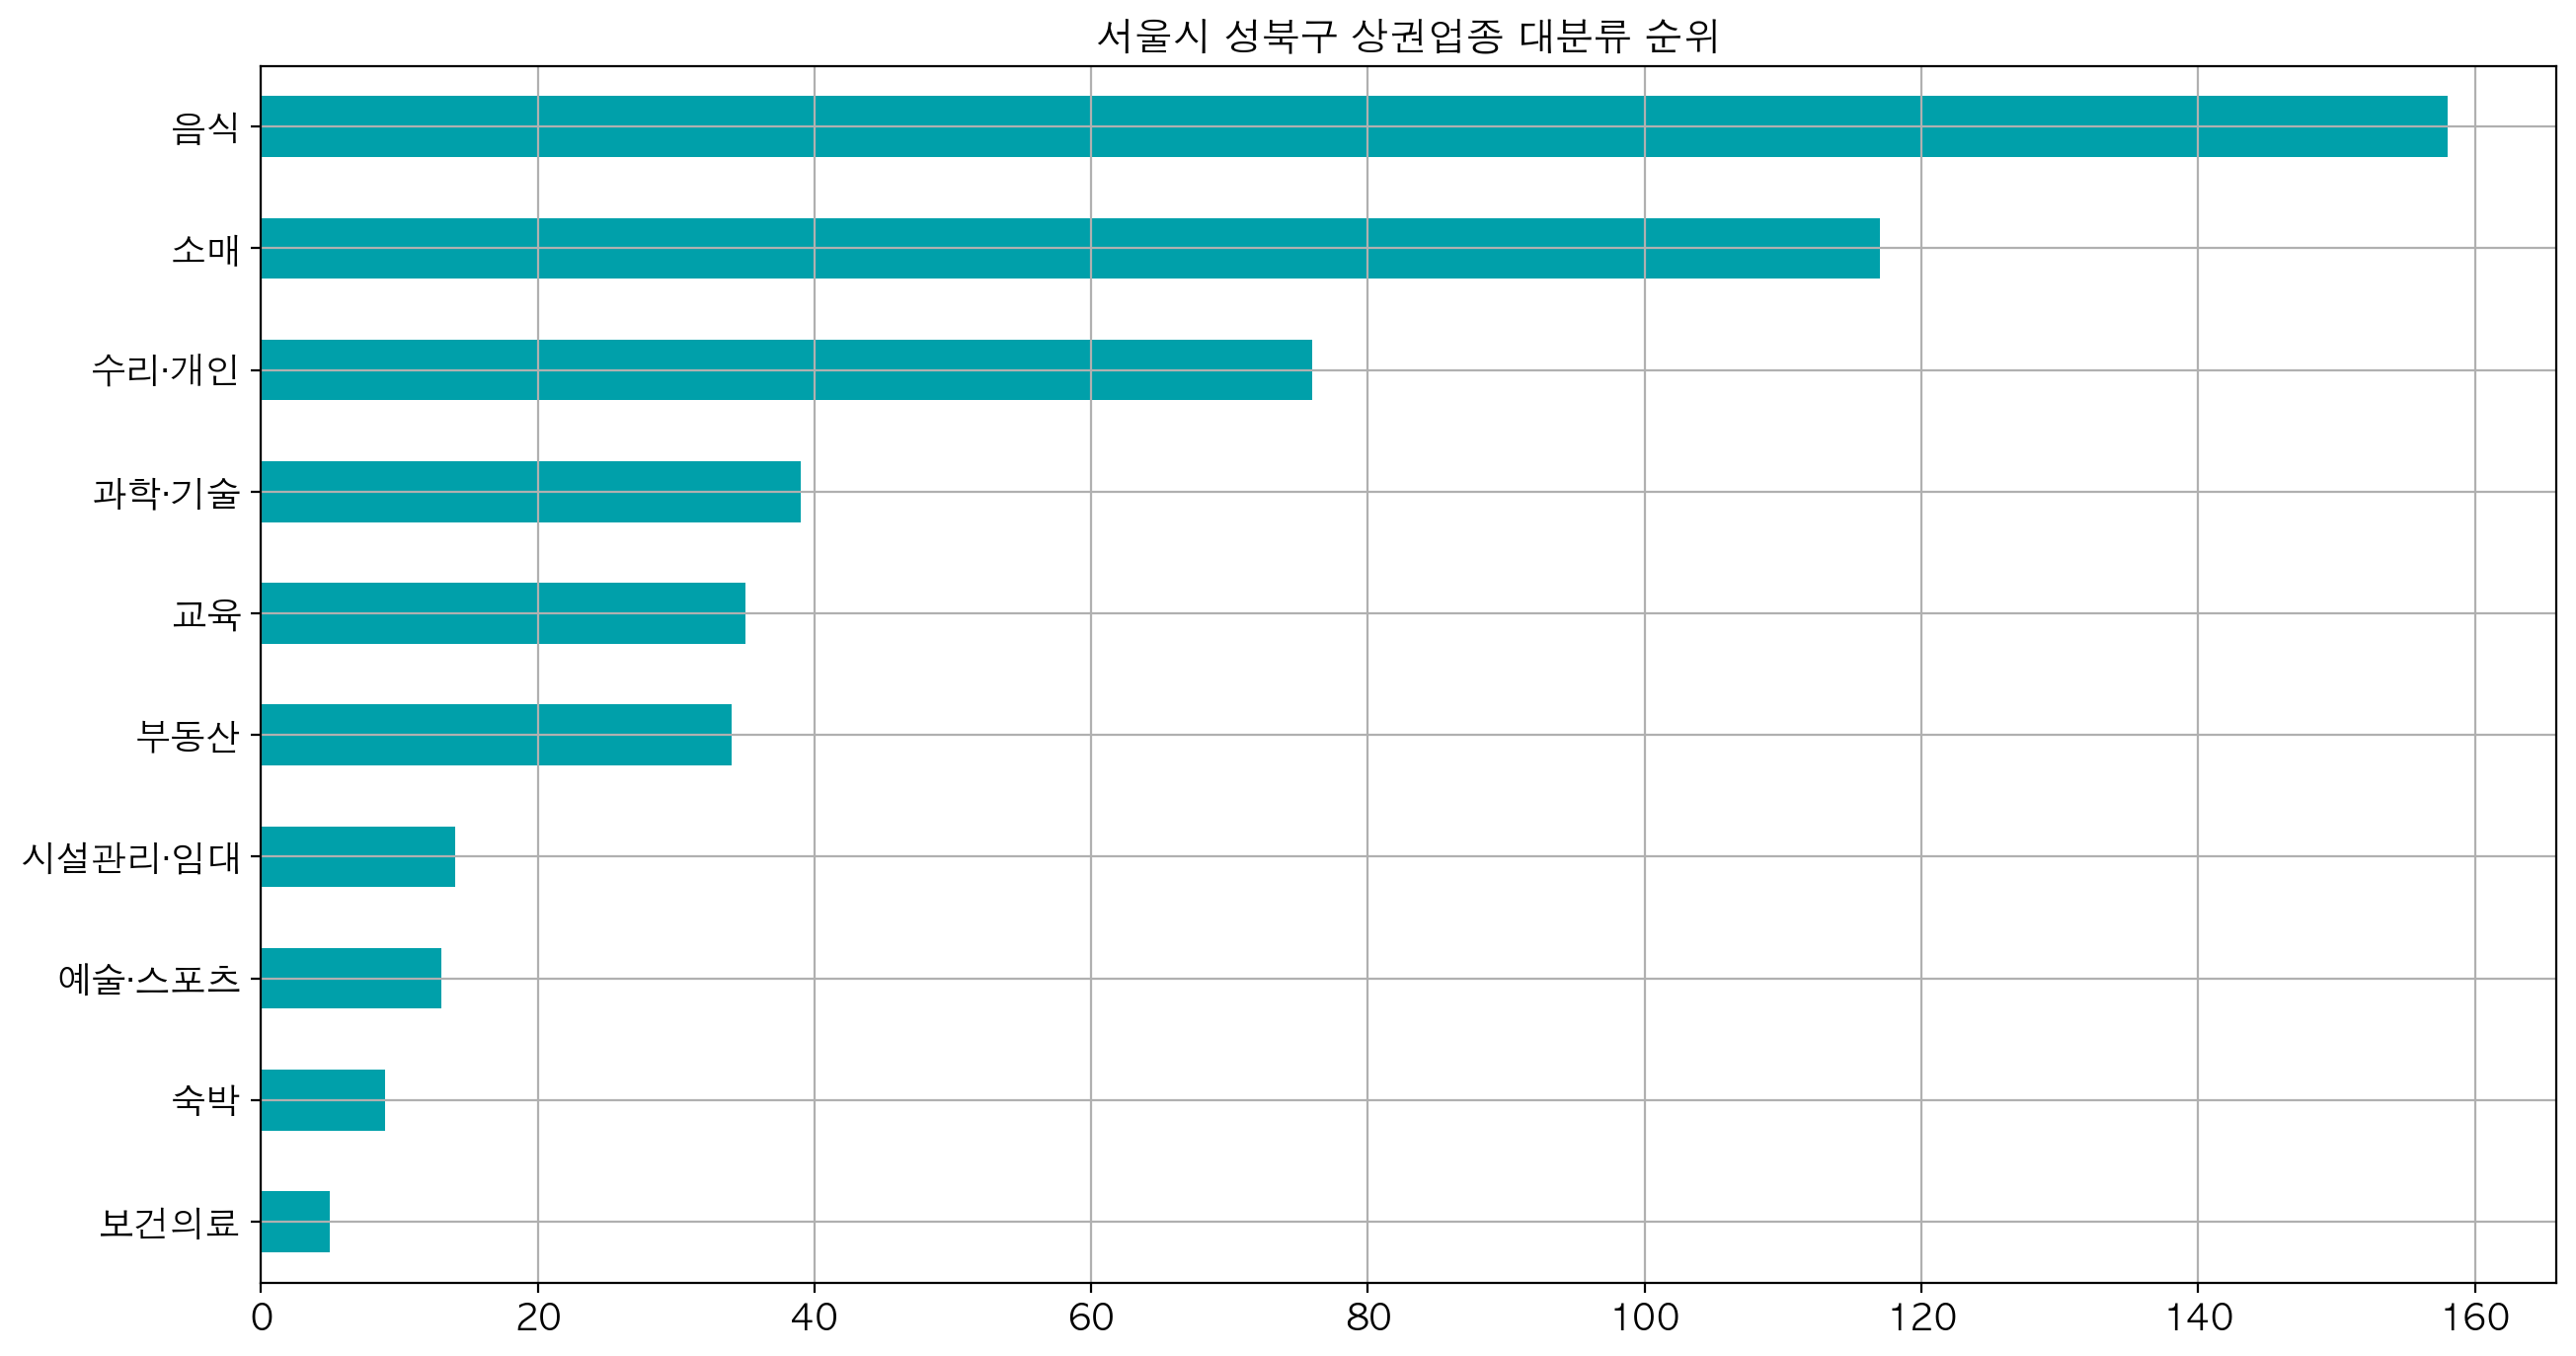

In [11]:
# 데이터 시각화하기
count_status = pd.value_counts(df_store_seongbuk['상권업종대분류명'].values) # 각 값들의 빈도수를 계산

# 정렬 후 가로 막대 그래프
count_status.sort_values().plot.barh(grid=True, figsize=(15,8), fontsize=13, color=(0, 160/255, 170/255))
plt.title('서울시 성북구 상권업종 대분류 순위', fontsize=14)

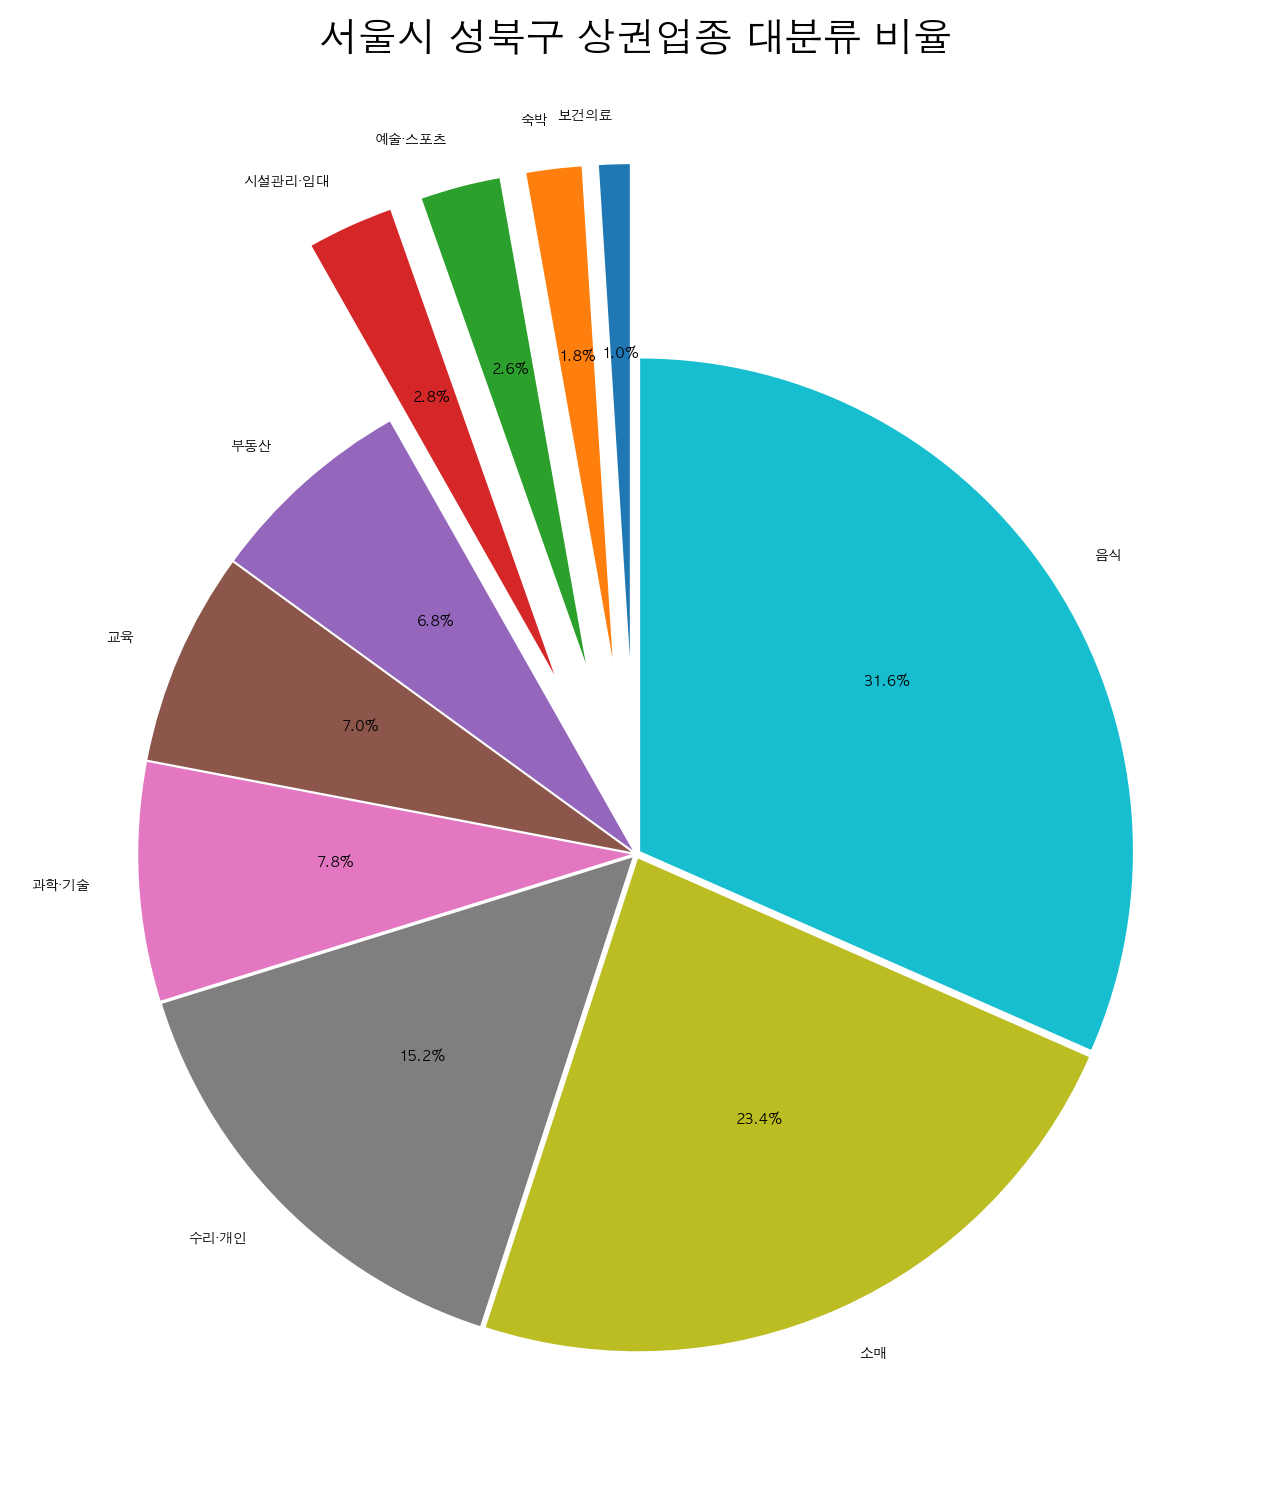

In [12]:
plt.figure(figsize=(8, 8)) # 8x8 크기의 pie chart
labels_frequency = count_status.sort_values()

# 계단형으로 텍스트 정렬을 위한 설정
explode_threshold = 30.0  # 상한선 비율을 30.0%로 설정
explode = [0.01 if freq >= explode_threshold else 0.4 for freq in labels_frequency] # 상한선을 넘는 경우 0.01을 할당하고, 그렇지 않은 경우 0.4를 할당


patches, texts, autotexts = plt.pie(labels_frequency, labels=labels_frequency.index, explode=explode, autopct='%1.1f%%\n', startangle=90)
plt.title('서울시 성북구 상권업종 대분류 비율\n\n\n\n', fontsize=14) # 제목을 설정

for t in texts: # 텍스트
    t.set_fontsize(5)
    t.set_color('black')

for t in autotexts: # 퍼센트
    t.set_fontsize(5)
    t.set_color('black')

plt.show() # 그림을 화면에 출력

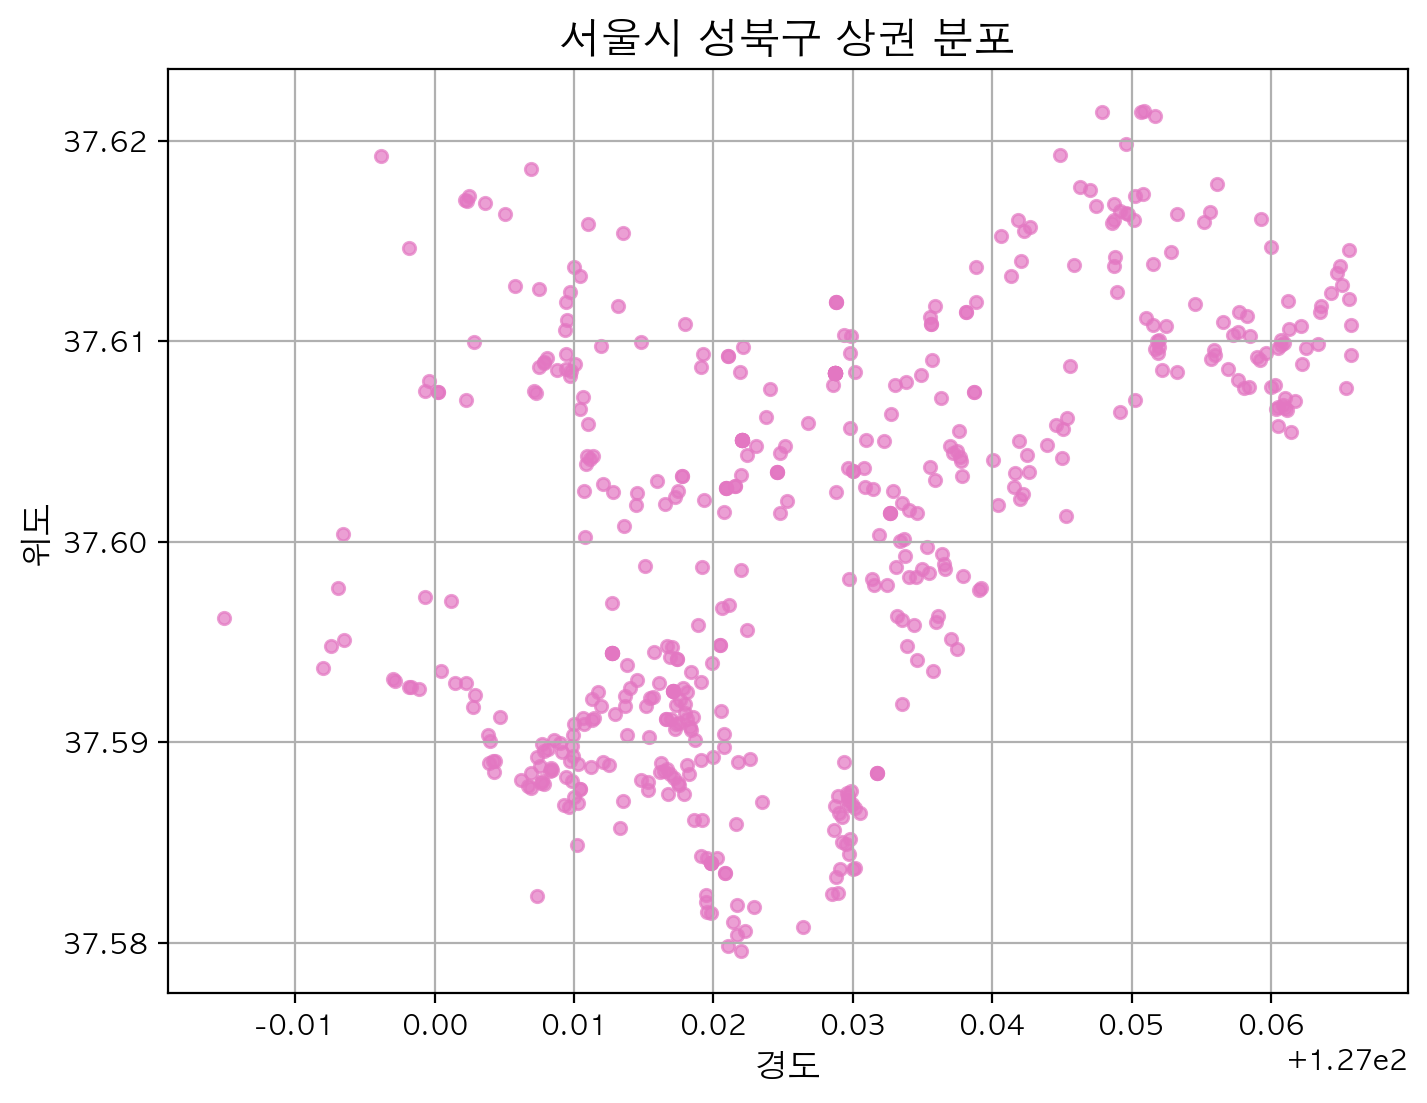

In [13]:
# 경도, 위도 정보로 지도 그려보기-소상공인상권은 고르게 분포되어 있을까? 
fig, ax = plt.subplots(figsize=(8, 6))# 사이즈 조절
df_store_seongbuk.plot.scatter(x='경도', y='위도', color='tab:pink', grid=True, alpha=0.7, ax=ax)# 산점도

ax.set_title('서울시 성북구 상권 분포', fontsize=15)
ax.set_xlabel('경도', fontsize=12) # x축의 레이블을 '경도'로 설정. 레이블의 글꼴 크기는 12
ax.set_ylabel('위도', fontsize=12) # y축의 레이블을 '위도'로 설정. 레이블의 글꼴 크기는 12

plt.show() # 그림을 화면에 출력

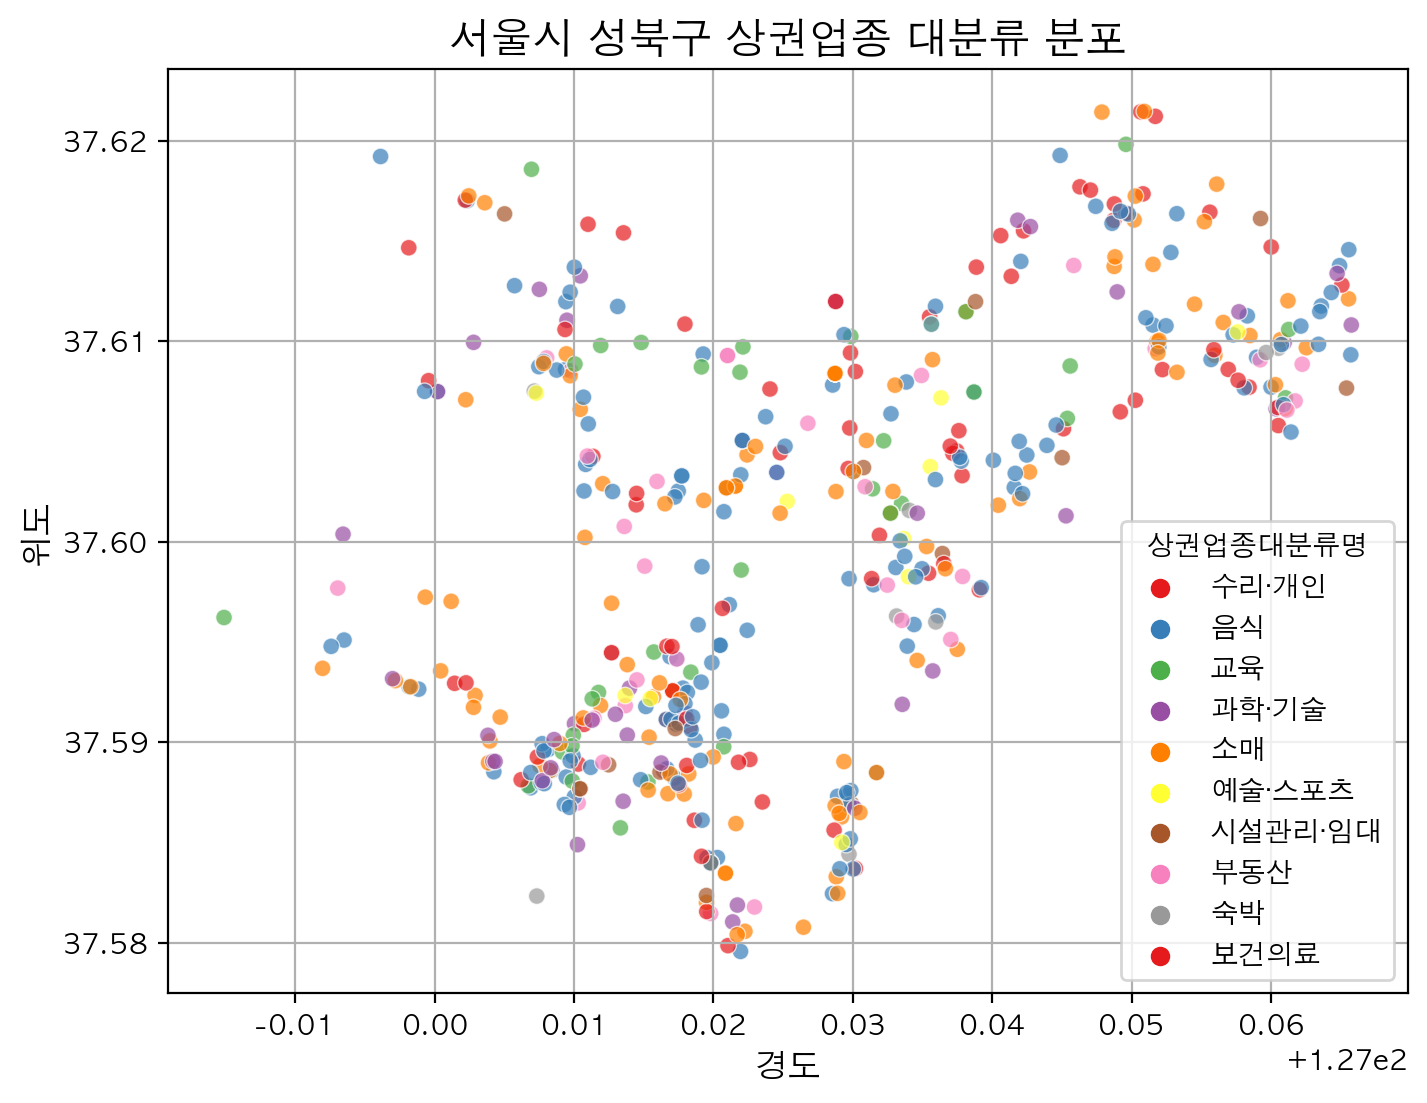

In [14]:
plt.figure(figsize=(8, 6)) # 사이즈를 조절
# 팔레트를 'Set1',투명도를 0.7
sns.scatterplot(data=df_store_seongbuk, x='경도', y='위도', hue='상권업종대분류명', palette='Set1', alpha=0.7)
plt.title('서울시 성북구 상권업종 대분류 분포', fontsize=15)
plt.xlabel('경도', fontsize=12) # 축의 레이블을 '경도'로 설정
plt.ylabel('위도', fontsize=12) # y축의 레이블을 '위도'로 설정 
plt.legend(title='상권업종대분류명', fontsize=10) # 범례를 설정
plt.grid(True) # 그리드 라인을 표시
plt.show() #그림을 화면에 출력

In [15]:
#서울시 성북구 상권위치 평균값
latitude = df_store_seongbuk['위도'].mean()
longitude = df_store_seongbuk['경도'].mean()
latitude, longitude

(37.60027896124666, 127.02702886832506)

In [16]:
m = folium.Map([latitude, longitude], zoom_start=11, tiles='Stamen Toner') #folium 활용한 <성북구> 상권 지도 시각화
#zoom_start:숫자가 커질수록 더 자세히 보여줌

for i in df_store_seongbuk.index: # 500개 데이터를 반복
    lat = df_store_seongbuk.loc[i, '위도'] # 각 데이터의 위도와 경도 값을 가져옵
    long = df_store_seongbuk.loc[i, '경도']

    title =f"{df_store_seongbuk.loc[i, '상호명']} - {df_store_seongbuk.loc[i, '도로명']}" # 상호명과 도로명을 조합하여 제목
    #print(i, lat, long, title)
    folium.CircleMarker([lat, long], radius=3, fill_color='red',  popup=title).add_to(m) # 해당 위치에 원형 마커를 생성
m

In [17]:
# ⚫ 데이터 전처리2- 처리

In [18]:
# 가변수 결측값 처리(범주형 변수 ->수치형으로 변환해서 파악)
pd.get_dummies(df_store_seongbuk['상권업종대분류명'],dummy_na=True)

,과학·기술,교육,보건의료,부동산,소매,수리·개인,숙박,시설관리·임대,예술·스포츠,음식,NaN
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,1,0
497,0,0,0,0,0,0,0,0,0,1,0
498,0,0,0,0,0,0,0,0,0,1,0


In [19]:
pd.get_dummies(df_store_seongbuk['상권업종중분류명'],dummy_na=True)

,가구 소매,가전·통신 소매,가전제품 수리,가정용품 대여,광고,교육 지원,구내식당·뷔페,기술 서비스,기타 가정용품 수리,기타 간이,...,전문 디자인,종합 소매,주점,중고 상품 소매,중식,철물·건설자재 소매,청소·방제,컴퓨터 수리,한식,NaN
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
pd.get_dummies(df_store_seongbuk['법정동명'], dummy_na=True)

,길음동,돈암동,동선동1가,동선동2가,동선동3가,동선동4가,동선동5가,동소문동1가,동소문동2가,동소문동3가,...,성북동1가,안암동1가,안암동2가,안암동3가,안암동5가,장위동,정릉동,종암동,하월곡동,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# 크로스 테이블 생성, 검증 빈도표(대분류명과 법접동명), 연광성 분석
cross_table = pd.crosstab(df_store_seongbuk['상권업종대분류명'], df_store_seongbuk['법정동명'])
print(cross_table)

법정동명      길음동  돈암동  동선동1가  동선동2가  동선동3가  동선동4가  동선동5가  동소문동1가  동소문동2가  동소문동3가  \
상권업종대분류명                                                                        
과학·기술       1    0      1      0      0      0      0       1       2       1   
교육          4    2      1      1      0      0      0       0       1       1   
보건의료        1    0      1      0      0      0      0       0       0       0   
부동산         6    3      0      0      0      1      0       0       0       0   
소매         18    3      4      0      0      0      0       1       2       0   
수리·개인       6    3      1      1      0      2      1       1       0       0   
숙박          0    0      0      0      0      0      0       0       0       0   
시설관리·임대     0    0      1      0      0      0      0       0       0       0   
예술·스포츠      0    2      0      0      0      0      0       0       0       0   
음식         12    2      9      4      4      4      0       3       5       1   

법정동명      ...  성북동  성북동1가  

In [22]:
#카이제곱 검정 수행 -범주형 데이터에 사용(대분류명과 법접동명)
chi2, p, dof, expected = chi2_contingency(cross_table)

print('카이제곱 검정 결과:')
print('통계량 (Chi-square):', chi2)
print('p-value:', p)
print('자유도 (Degrees of Freedom):', dof)
print('기대값 (Expected Values):')
print(expected)#귀무가설, 대립가설을 통해 분석할 수 있음

카이제곱 검정 결과:
통계량 (Chi-square): 309.24248242200076
p-value: 0.5808983838423398
자유도 (Degrees of Freedom): 315
기대값 (Expected Values):
[[3.7440e+00 1.1700e+00 1.4040e+00 4.6800e-01 3.1200e-01 5.4600e-01
  7.8000e-02 4.6800e-01 7.8000e-01 2.3400e-01 7.0200e-01 4.6800e-01
  4.6800e-01 7.8000e-02 3.1200e-01 3.1200e-01 6.2400e-01 7.8000e-02
  3.1200e-01 3.9000e-01 6.2400e-01 2.3400e-01 3.9000e-01 1.0920e+00
  6.2400e-01 3.6660e+00 1.4820e+00 4.6800e-01 2.3400e-01 1.5600e-01
  7.8000e-02 2.1840e+00 3.7440e+00 4.6800e+00 3.3540e+00 3.0420e+00]
 [3.3600e+00 1.0500e+00 1.2600e+00 4.2000e-01 2.8000e-01 4.9000e-01
  7.0000e-02 4.2000e-01 7.0000e-01 2.1000e-01 6.3000e-01 4.2000e-01
  4.2000e-01 7.0000e-02 2.8000e-01 2.8000e-01 5.6000e-01 7.0000e-02
  2.8000e-01 3.5000e-01 5.6000e-01 2.1000e-01 3.5000e-01 9.8000e-01
  5.6000e-01 3.2900e+00 1.3300e+00 4.2000e-01 2.1000e-01 1.4000e-01
  7.0000e-02 1.9600e+00 3.3600e+00 4.2000e+00 3.0100e+00 2.7300e+00]
 [4.8000e-01 1.5000e-01 1.8000e-01 6.0000e-02 4.0000

In [23]:
# 크로스 테이블 생성, 검증 빈도표 (중분류명과 법접동명)
cross_table = pd.crosstab(df_store_seongbuk['상권업종중분류명'], df_store_seongbuk['법정동명'])
print(cross_table)

법정동명        길음동  돈암동  동선동1가  동선동2가  동선동3가  동선동4가  동선동5가  동소문동1가  동소문동2가  \
상권업종중분류명                                                                  
가구 소매         1    1      0      0      0      0      0       0       0   
가전·통신 소매      0    0      0      0      0      0      0       1       0   
가전제품 수리       0    0      0      0      0      0      0       0       0   
가정용품 대여       0    0      1      0      0      0      0       0       0   
광고            0    0      0      0      0      0      0       0       1   
...         ...  ...    ...    ...    ...    ...    ...     ...     ...   
중식            1    0      2      0      0      0      0       0       0   
철물·건설자재 소매    0    0      0      0      0      0      0       0       0   
청소·방제         0    0      0      0      0      0      0       0       0   
컴퓨터 수리        0    0      0      0      0      0      0       0       0   
한식            2    0      1      2      0      2      0       2       0   

법정동명        동소문동3가  ... 

In [24]:
# 카이제곱 검정 수행 -범주형 데이터에 사용 (중분류명과 법접동명)
chi2, p, dof, expected = chi2_contingency(cross_table)

print('카이제곱 검정 결과:')
print('통계량 (Chi-square):', chi2)
print('p-value:', p)
print('자유도 (Degrees of Freedom):', dof)
print('기대값 (Expected Values):')
print(expected)#귀무가설, 대립가설을 통해 분석할 수 있음

카이제곱 검정 결과:
통계량 (Chi-square): 2130.26389110307
p-value: 0.3173820136333443
자유도 (Degrees of Freedom): 2100
기대값 (Expected Values):
[[0.384 0.12  0.144 ... 0.48  0.344 0.312]
 [0.576 0.18  0.216 ... 0.72  0.516 0.468]
 [0.48  0.15  0.18  ... 0.6   0.43  0.39 ]
 ...
 [0.48  0.15  0.18  ... 0.6   0.43  0.39 ]
 [0.096 0.03  0.036 ... 0.12  0.086 0.078]
 [4.128 1.29  1.548 ... 5.16  3.698 3.354]]


In [25]:
# 학습/검증/시험 데이터로 분활
# random_state는 코드를 다시 실행할때 동일한 파티션을 얻기 위해 정의된 값으로 설정
# 훈련 60% 검증 40%
# 훈련 데이터와 테스트 데이터로 분할
train_data, test_data = train_test_split(df_store_seongbuk, test_size=0.4, random_state=26)

print('Training: ', train_data.shape)
print('validData: ', test_data.shape)

Training:  (300, 11)
validData:  (200, 11)


In [26]:
#서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을 상권업종대분류명으로 분류해보는 예제입니다.
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
train_data.상권업종대분류명.value_counts()

음식         103
소매          71
수리·개인       43
과학·기술       30
교육          22
부동산         17
시설관리·임대      7
예술·스포츠       4
보건의료         2
숙박           1
Name: 상권업종대분류명, dtype: int64

In [27]:
test_data.상권업종대분류명.value_counts()

음식         55
소매         46
수리·개인      33
부동산        17
교육         13
과학·기술       9
예술·스포츠      9
숙박          8
시설관리·임대     7
보건의료        3
Name: 상권업종대분류명, dtype: int64

In [28]:
train_df = pd.DataFrame(train_data)
train_df = train_df[['경도', '위도', '상권업종대분류명']]
test_df = pd.DataFrame(test_data)
test_df = test_df[['경도', '위도', '상권업종대분류명']]

train_df.reset_index(drop=True, inplace=True)#인덱스 재정의
test_df.reset_index(drop=True, inplace=True)#인덱스 재정의

X_train = train_df[['경도', '위도']]
y_train = train_df[['상권업종대분류명']]

X_test = test_df[['경도', '위도']]
y_test = test_df[['상권업종대분류명']]

In [29]:
# 2개의 컬럼을 describe로 요약하기.
# 2개의 컬럼을 불러올때는, 리스트 형태로 불러오기.
train_df.describe() 

,경도,위도
count,300.000000,300.000000
mean,127.026001,37.600278
std,0.017399,0.010260
min,126.992575,37.579565
25%,127.012069,37.591064
50%,127.021976,37.602446
75%,127.036571,37.608585
max,127.065765,37.621457


In [30]:
test_df.describe()

,경도,위도
count,200.000000,200.000000
mean,127.028570,37.600281
std,0.018061,0.010361
min,126.984890,37.580774
25%,127.014711,37.590597
50%,127.025218,37.601830
75%,127.040484,37.609095
max,127.065568,37.621437


Text(0.5, 1.0, 'district visualization in 2d plane')

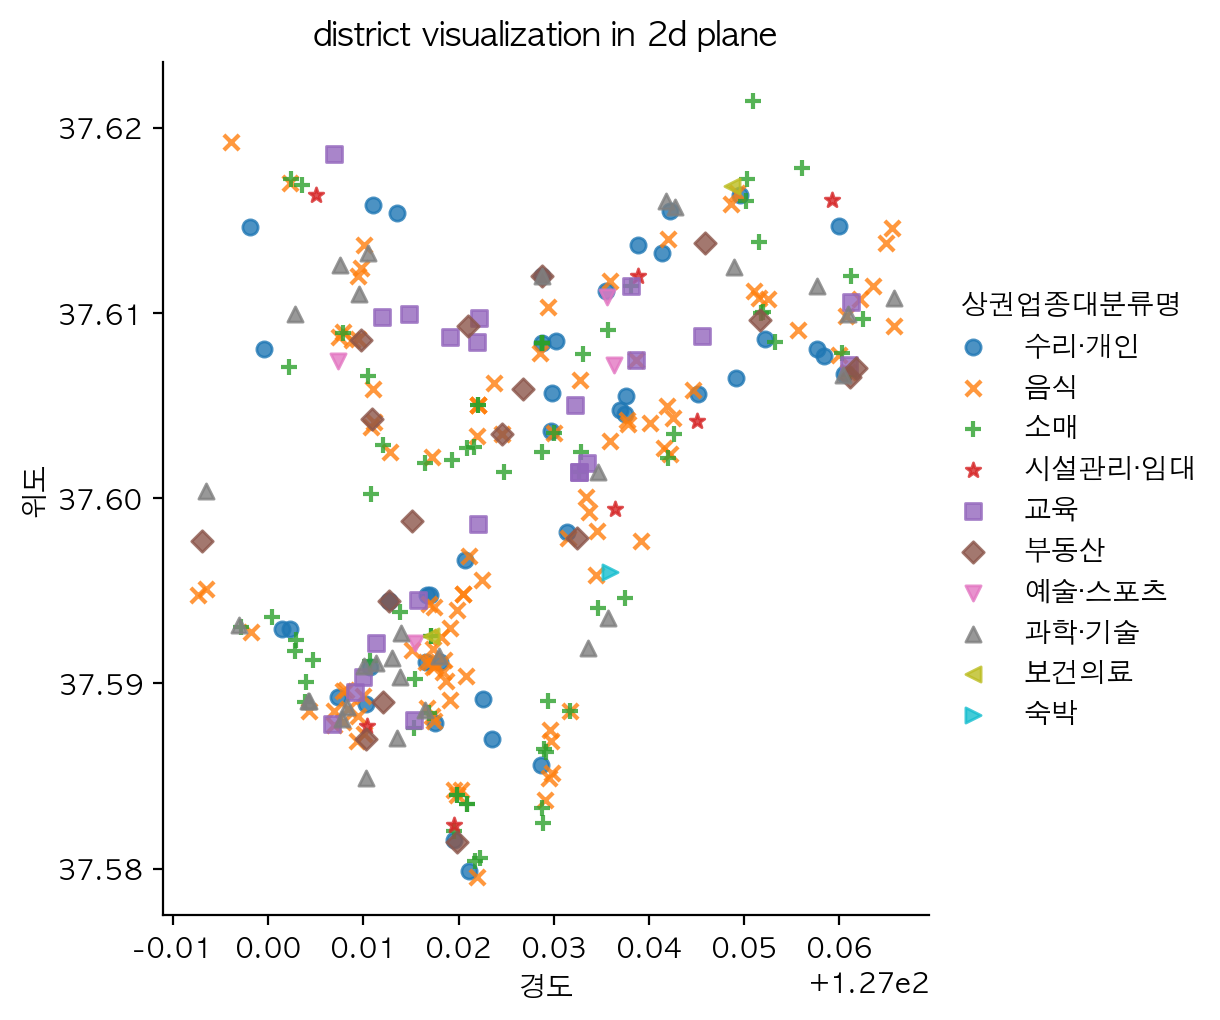

In [31]:
# ⚫ 분류모델
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

# 경도, 위도에 따른 데이터 시각화 -지역적 패턴 파악 
sns.lmplot(data = train_df, x='경도', y='위도', fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 30}, # 좌표 상의 점의 크기
           markers=["o", "x", "+", "*", "s",
                    "D", "v", "^", "<", ">"],
           hue='상권업종대분류명')

# title
plt.title('district visualization in 2d plane')

In [32]:
#  KNN (K-Nearest Neighbors) 분류기
results = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) # 훈련 데이터인 X_train과 y_train으로 모델을 학습
    results.append({ # 정확도를 딕셔너리 형태로 추가
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

In [33]:
results = pd.DataFrame(results) # 결과 리스트를 데이터프레임으로 변환
print(results) #결과 출력
# 의사결정트리

     k  accuracy
0    1     0.220
1    2     0.180
2    3     0.210
3    4     0.240
4    5     0.240
5    6     0.240
6    7     0.245
7    8     0.270
8    9     0.260
9   10     0.300
10  11     0.270
11  12     0.285
12  13     0.300
13  14     0.290


In [34]:
def display_decision_surface(clf,X, y):
    # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X.경도.min() - 0.01
    x_max = X.경도.max() + 0.01
    y_min = X.위도.min() - 0.01
    y_max = X.위도.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#7FFF00', '#00FF00', '#00FF7F', '#00FFFF', '#007FFF', '#0000FF', '#7F00FF']  # 10가지 색상 코드
    plot_step = 0.001 # 축단위

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].경도, 
                    X.loc[idx].위도, 
                    c=color, 
                    label=le.classes_[i],
                    cmap=plt.cm.rainbow, edgecolor='black', s=200)
  
    plt.title("Decision surface of a decision tree",fontsize=16) # 챠트 제목
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14) # 챠트 기호 설명
    plt.xlabel('경도',fontsize=16)  # x축의 이름과 폰트 크기 설정
    plt.ylabel('위도',fontsize=16)  # y축의 이름과 폰트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5] # 챠트 크기 설정
    plt.rcParams["font.size"] = 14  # 챠트 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14 # x축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14  # y축 좌표상의 폰트 크기 설정

    # 챠트 그리기
    plt.show()

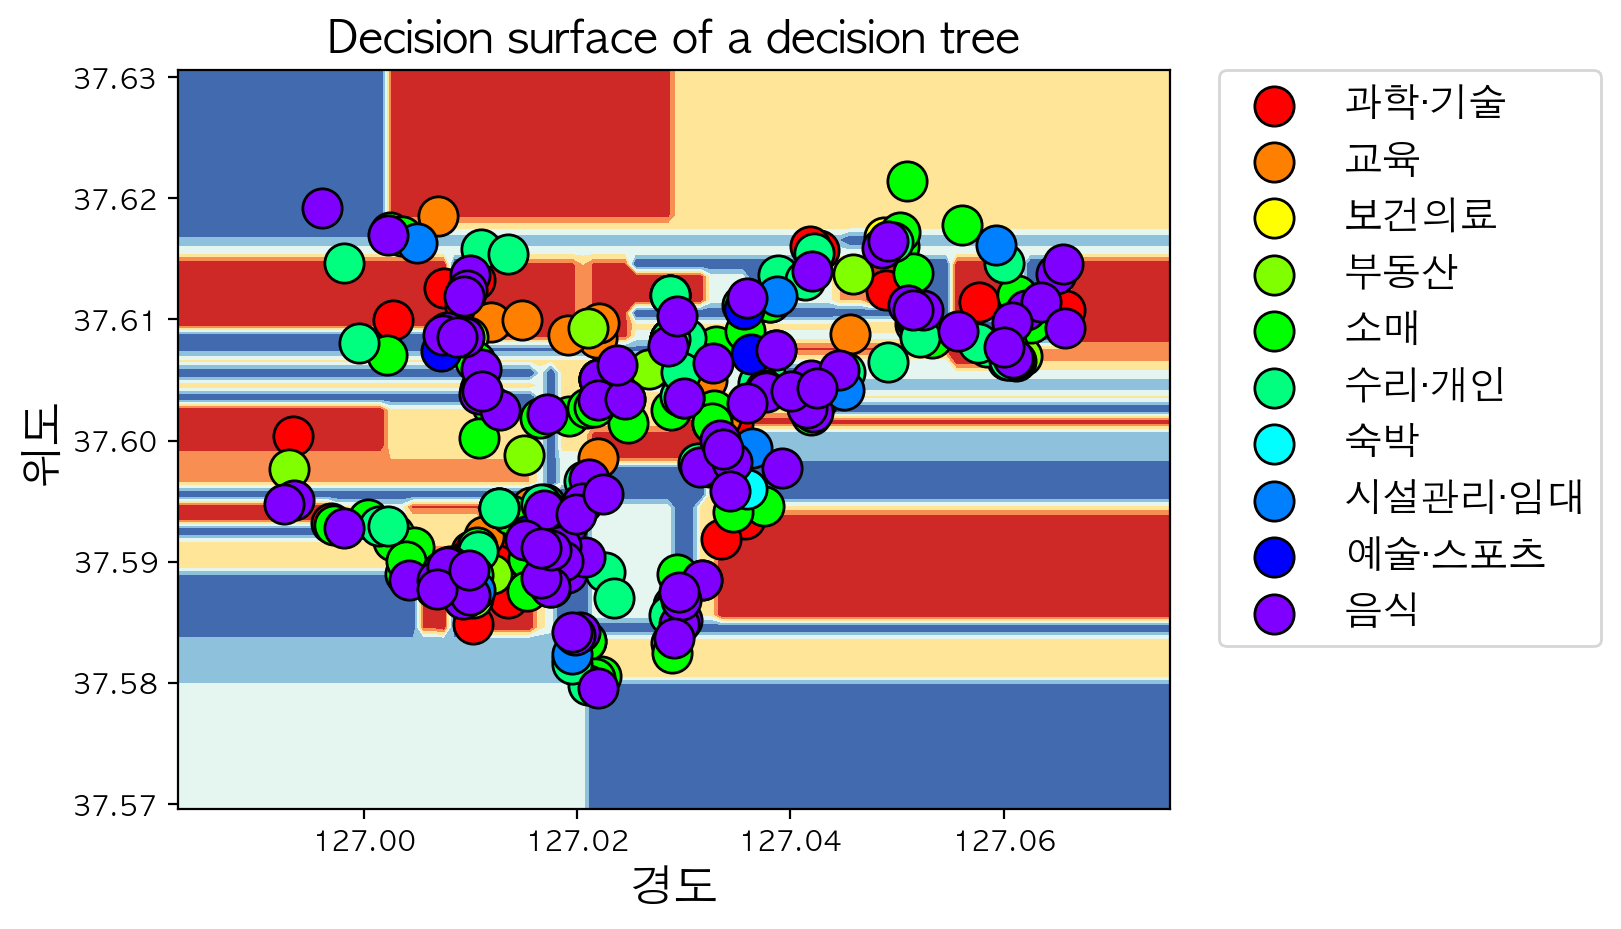

In [35]:
#Decision Tree 모델 생성 및 
# pyplot은 숫자로 표현된 레이블을 시각화할 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder() #문자인 label값을 숫자 값으로 인코딩해주는 함수이다. 예를 들어 '음식',  '소매', '수리·개인','부동산'이 있다면 "0, 1, 2, 3"으로 바꿔주는 것이다.
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

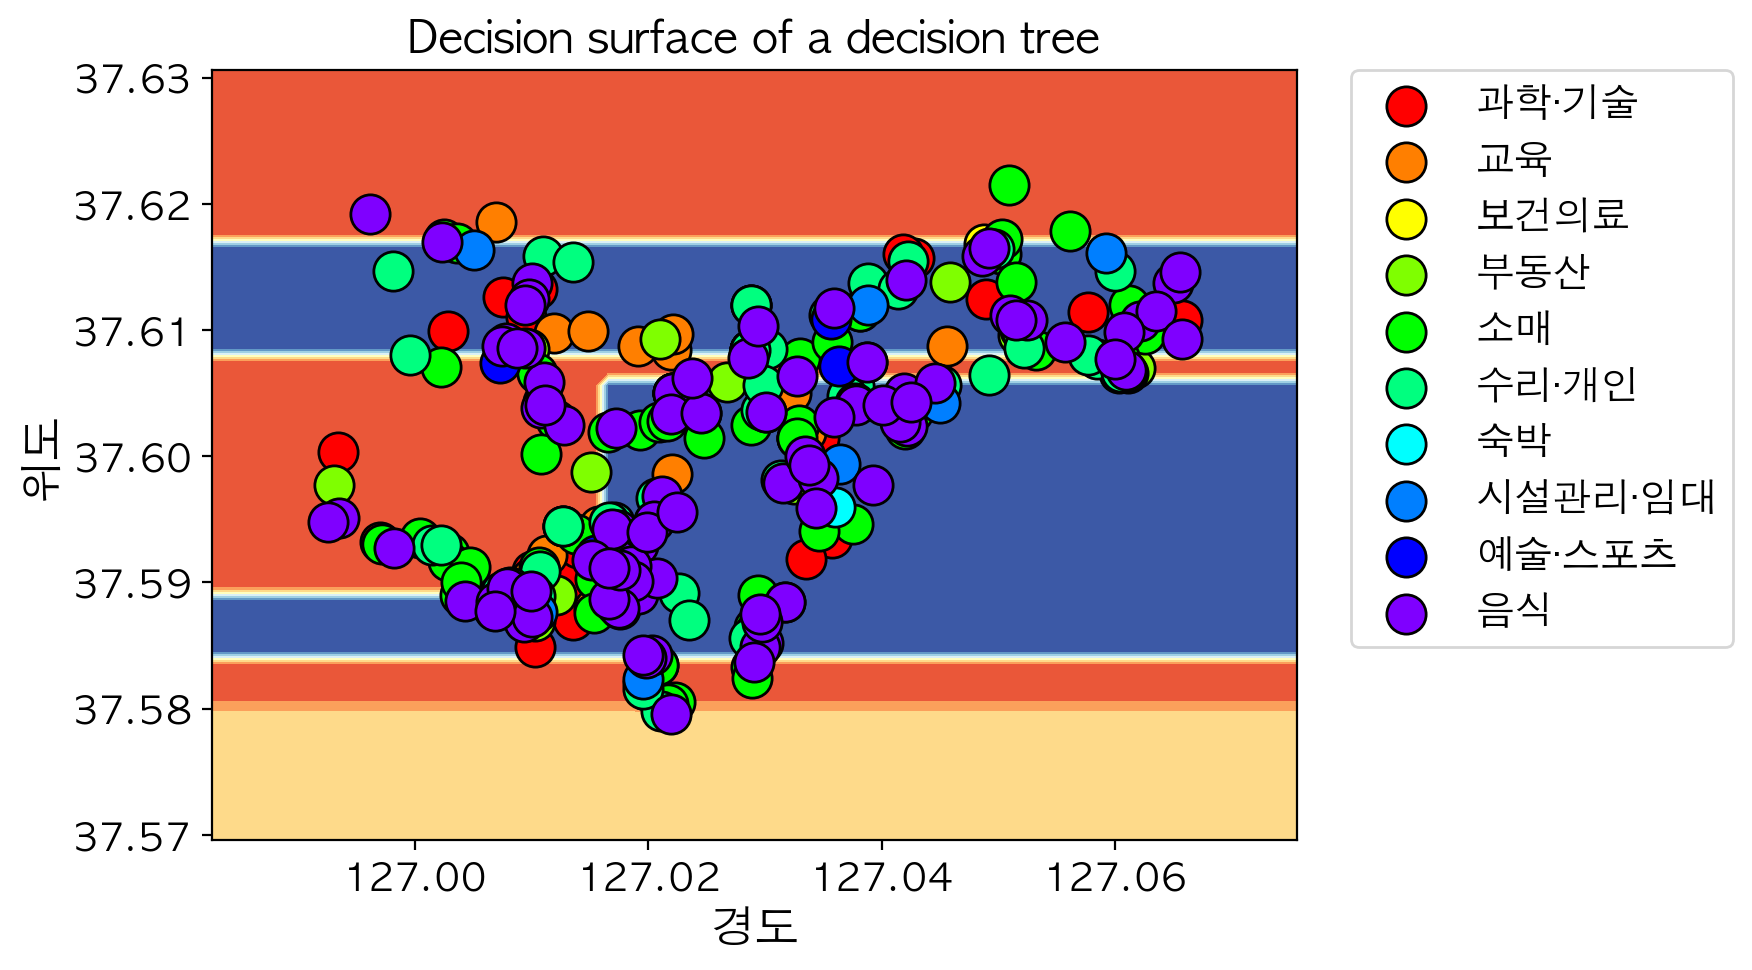

In [36]:
# 파라미터 설정한 모델의 결정 표면 시각화
clf = tree.DecisionTreeClassifier(max_depth=4, 
                                  min_samples_split=2,
                                  min_samples_leaf=2, 
                                  random_state=0).fit(X_train, y_encoded.ravel())
display_decision_surface(clf,X_train, y_encoded)

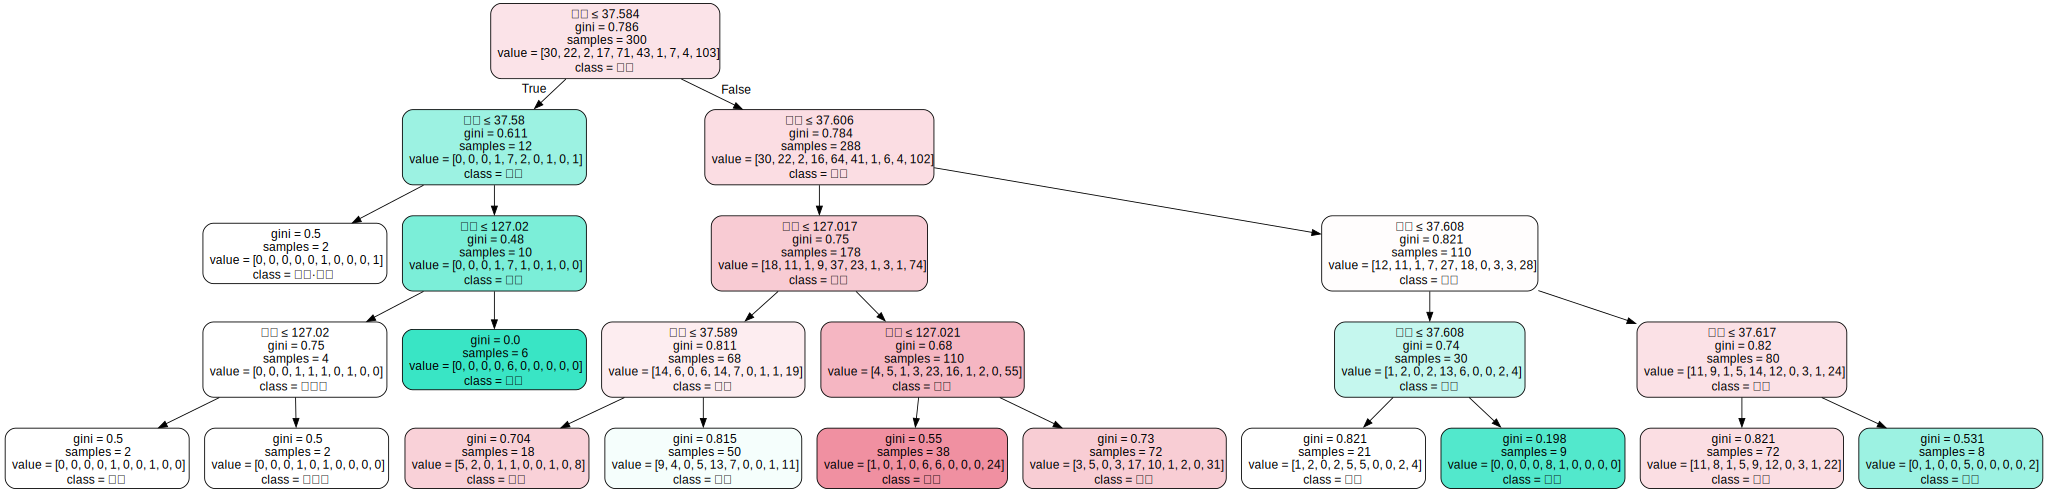

In [37]:
#의사결정트리시각화
#sklearn.tree.export_graphviz 메소드와 graphviz 를 이용해서 의사결정나무 시각화
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) # 의사결정 트리를 시각화위해 호출
graph = graphviz.Source(dot_data)
graph.render("seongbuk") # "seongbuk"라는 이름으로 그래프를 렌더링

# 의사결정 트리를 시각화
dot_data = tree.export_graphviz(clf, out_file=None, 
                        feature_names=['경도','위도'],  # 특성의 이름을 설정
                        class_names= ['과학·기술', '교육', '보건의료', '부동산', '소매', # 클래스의 이름을 설정
                                      '수리·개인', '숙박', '시설관리·임대','예술·스포츠', '음식'],  
                        filled=True, rounded=True,  #노드를 색상, 모서리
                        special_characters=True) # 특수 문자를 포함한 노드 레이블을 처리
graph = graphviz.Source(dot_data)  
graph.view() #시각화된 그래프를 출력
graph

In [38]:
# ⚫ 분석 결과
#모델을 테스트
# from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
#모델 예측 정확도(accuracy)를 확인 - 비교적 낮음
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), le.classes_[pred])) )

accuracy : 0.3


In [39]:
comparison = pd.DataFrame({'prediction':le.classes_[pred], 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,소매,숙박
1,음식,과학·기술
2,소매,음식
3,음식,시설관리·임대
4,음식,소매
...,...,...
195,음식,수리·개인
196,음식,음식
197,음식,음식
198,소매,수리·개인
